Project file

# Uploading the dataset

In [605]:
from data import *
import data
from util import *
import warnings
columns = pd.read_csv('columns.csv')
responses = pd.read_csv('responses.csv')

Looking at the data

In [612]:
responses.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


## Feature Selction 
Filtering columns based on the mutual information with the dicreete variable empathy to correctly identify the features to keep

Checking the range of output

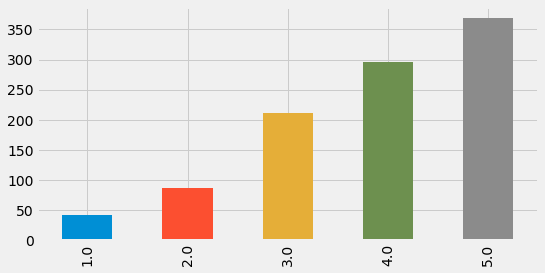

In [613]:
responses['Empathy'].value_counts().sort_index().plot.bar(figsize=(8, 4))

Checking correlation of Empathy with some of the features

['Giving', 'Compassion to animals', 'Friends versus money', 'Final judgement', 'Self-criticism']


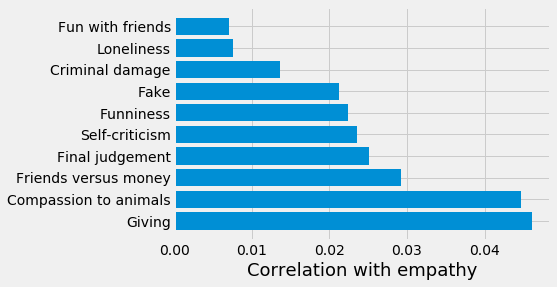

In [615]:
from sklearn.feature_selection import mutual_info_classif as mf
import matplotlib.pyplot as plt
#list of items that relate to emapthy
items_list = ['Fake','Compassion to animals','Final judgement','Giving', 'Friends versus money','Fun with friends','Criminal damage','Loneliness','Funniness','Self-criticism','Empathy']
empathy_data = responses.filter(items = items_list)
empathy_X = empathy_data.iloc[:,0:-1]
empathy_target = empathy_data.iloc[:,-1]
empathy_X, empathy_target = missing_values(empathy_X, empathy_target)
b = mf(empathy_X,empathy_target,discrete_features=[0,1,2,3,4,5,6,7,8,9])
a  = np.argsort(b)[::-1]
items_1 = [items_list[i] for i in a][:5]
#looking atthe best of 5 features
print(items_1)
plt.barh(np.arange(10),[b[i] for i in a],tick_label=[items_list[i] for i in a])
plt.xlabel('Correlation with empathy',fontsize=18)
plt.show()

# Preprocessing

In [878]:
import importlib
importlib.reload(util)
import preprocess as pr
x = data.Load()
y = pr.Preprocess()
X_train,Y_train,X_dev,Y_dev,X_test,Y_test = y.get_data()

preprocessing data


@@to be removed : cheacking for training data

In [879]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm.fit(X_train,Y_train)
X_train = norm.transform(X_train)
X_dev = norm.transform(X_dev)
X_test = norm.transform(X_test)
X_train

array([[0.02765049, 0.02212039, 0.01659029, ..., 0.91246604, 0.33180583,
        0.0055301 ],
       [0.02615937, 0.01569562, 0.0209275 , ..., 0.88941869, 0.3923906 ,
        0.00523187],
       [0.01937756, 0.01453317, 0.01453317, ..., 0.89621223, 0.39724001,
        0.00484439],
       ...,
       [0.02522776, 0.01513666, 0.01513666, ..., 0.91324501, 0.35318868,
        0.00504555],
       [0.02793165, 0.02234532, 0.01117266, ..., 0.89381291, 0.36311149,
        0.00558633],
       [0.02770136, 0.02216109, 0.01662082, ..., 0.92522551, 0.29363444,
        0.00554027]])

Training on decision tree

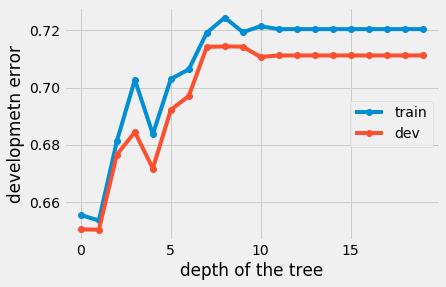

In [695]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
training_error = list()
development_error = list()
testing_error = list()
for i in range(1,21):
    dt = DecisionTreeClassifier(max_depth = i,random_state = 4)
    dt.fit(X_train,Y_train)
    training_error.append(1-np.mean(dt.predict(X_train) == Y_train))
    development_error.append(1-np.mean(dt.predict(X_dev) == Y_dev))
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
xs = np.arange(0,20)
p1 = plt.plot(xs,training_error, 'o-', label = 'train')
p2 = plt.plot(xs,development_error, 'o-', label = 'dev')
plt.legend(loc='right')
plt.xlabel("depth of the tree")    
plt.ylabel("developmetn error")
plt.show()

So based on the development data we would select the depth of 2 as the best depth , as after this point the development error seems to increase.

### Baseline models

In [696]:
import importlib
import util as ut
importlib.reload(util)
tree =  ut.decision_tree(X_train,Y_train)
score = ut.prediction(tree,X_dev,Y_dev)
print(score)

0.4207920792079208


In [700]:
from util import *
importlib.reload(util)
svm1 = svm_wrapper(X_train,Y_train)
score = ut.prediction(svm1,X_dev,Y_dev)
print("SVM accuarcy: ",score)

SVM accuarcy:  0.35148514851485146


Naive bayes

In [705]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
print(np.mean(clf.predict(X_dev) == Y_dev))

0.35148514851485146


In [706]:
from sklearn import linear_model
clf = linear_model.Lasso()
clf.fit(X_train, Y_train)
np.mean(clf.predict(X_train)== Y_train)

0.0

In [146]:
X_train.shape

(606, 363)

In [704]:
from util import *
importlib.reload(util)
mlp = mlp_wrapper(X_train, Y_train)
score = ut.prediction(mlp,X_dev,Y_dev)
print(score)

0.35148514851485146


### Tuning the hyperparemeters of KNN

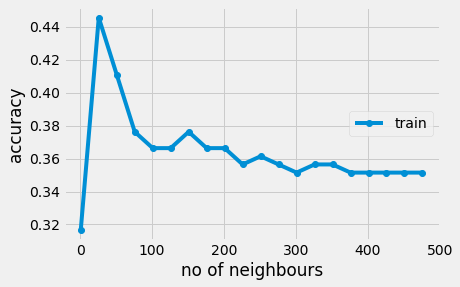

In [178]:
from util import *
import matplotlib.pyplot as plt
importlib.reload(util)
training_acc = []
for i in range(1,500,25):
    score,_ = knn(X_train,Y_train, X_dev,Y_dev,i)
    training_acc.append(score)
%matplotlib inline
plt.style.use("fivethirtyeight")
xs = np.arange(1,500,25)
p1 = plt.plot(xs,training_acc, 'o-', label = 'train')
plt.legend(loc='right')
plt.xlabel("no of neighbours")    
plt.ylabel("accuracy")
plt.show()

In [708]:
knn = knn(X_train,Y_train)
score = ut.prediction(knn,X_dev,Y_dev)
print(score)

TypeError: 'GridSearchCV' object is not callable

#### So with only knn with n=2, shows that data might be sparsed

Trying bagging with decision tree and trying depth of different decision tree

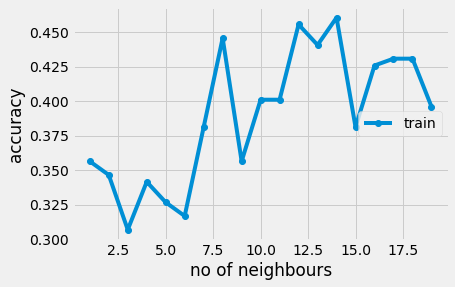

In [220]:
from util import *
import numpy as np
importlib.reload(util)
dev_acc = list()
for i in range(1,20):
    score,_ = bagging(X_train, Y_train, X_dev, Y_dev, i)
    dev_acc.append(score)
%matplotlib inline
plt.style.use("fivethirtyeight")
xs = np.arange(1,20)
p1 = plt.plot(xs,dev_acc, 'o-', label = 'train')
plt.legend(loc='right')
plt.xlabel("no of neighbours")    
plt.ylabel("accuracy")
plt.show()

Plotting the scatterplot for PCA

In [637]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
X_embedded = TSNE(n_components=3).fit_transform(X_train)

pca = PCA(n_components=2)
#pca.fit(X_train)
pca_result = pca.fit_transform(X_train)
print(X_embedded.shape)
print(pca.explained_variance_ratio_)

(606, 3)
[0.75318698 0.13789891]


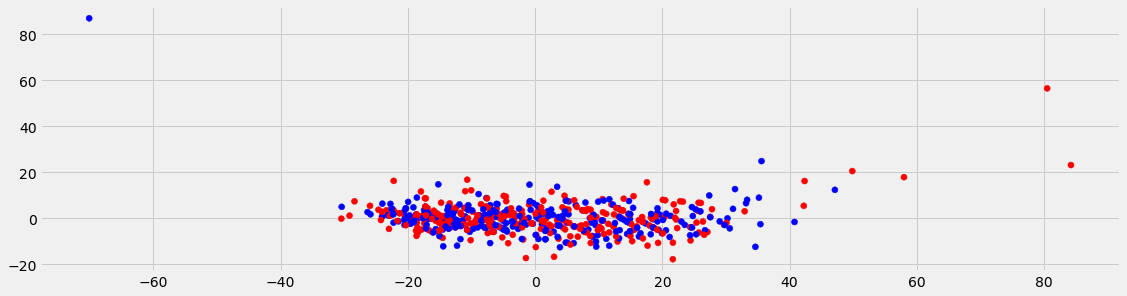

In [639]:
from ggplot import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
color = ['blue','red']
fig = plt.figure(figsize=(100,10 ))
ax = fig.add_subplot(251)
ax.scatter(pca_result[:,0], pca_result[:,1],color=color,cmap=plt.cm.Spectral)

##

In [710]:
import numpy as np
importlib.reload(util)
 = bagging(X_train, Y_train)
print(score)

TypeError: bagging() missing 2 required positional arguments: 'X_test' and 'Y_test'

In [234]:
import numpy as np
importlib.reload(util)
from sklearn.ensemble import GradientBoostingClassifier
boosting(X_train,Y_train, X_test, Y_test)

NameError: name 'boosting' is not defined

Trying bagging with dt as base model

In [635]:
from util import *
importlib.reload(util)
tree = decision_tree(X_train, Y_train, X_dev, Y_dev) 
bag = BaggingClassifier(random_state= 4,base_estimator = tree)
bag.fit(X_train,Y_train)
Y_pred = bag.predict(X_dev)
score = accuracy_score(Y_dev,Y_pred)
print(score)

TypeError: decision_tree() takes 2 positional arguments but 4 were given

Finding accuarcy with different depth of decision tree

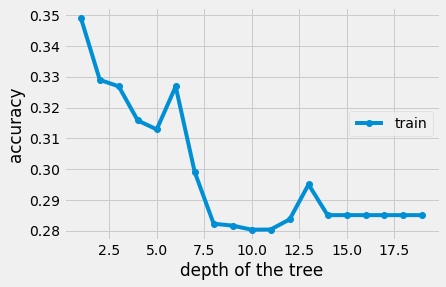

In [711]:
from sklearn.pipeline import Pipeline
score = [0]
for i in range(1,20):
    estimators1 = [('tree', PCA()), ('clf', DecisionTreeClassifier(max_depth =i,random_state = 4) )]
    pipe1 = Pipeline(estimators1)
    pipe1.fit(X_train,Y_train)
    Y_pred = pipe1.predict(X_dev)
    score.append(np.mean(Y_pred == Y_dev))
%matplotlib inline
plt.style.use("fivethirtyeight")
xs = np.arange(1,20)
p1 = plt.plot(xs,score[1:], 'o-', label = 'train')
plt.legend(loc='right')
plt.xlabel("depth of the tree")    
plt.ylabel("accuracy")
plt.show()

# Grid Searches

In [712]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'max_depth':np.arange(2,50)},
 ]
tree = GridSearchCV(DecisionTreeClassifier(),param_grid) 
tree.fit(X_train,Y_train)
Y_pred = tree.predict(X_dev)
print(np.mean(Y_pred == Y_dev))
# dt = DecisionTreeClassifier(max_depth = i,random_state = 4)

0.34969610822468383


In [720]:
param_grid = [{'n_neighbors': np.arange(2,250,20)}]
knn = GridSearchCV(KNeighborsClassifier(),param_grid) 
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_dev)
print(np.mean(Y_pred == Y_dev))

0.3195765121066562


In [721]:
from sklearn.svm import SVC
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf']},]
svm = GridSearchCV(SVC(),param_grid)
svm.fit(X_train,Y_train)
Y_pred = svm.predict(X_dev)
print(np.mean(Y_pred == Y_dev))

0.3254827958043329


In [587]:
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [722]:
from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(hidden_layer_sizes = (hidden_layer),activation = 'relu')
param_grid = [{'hidden_layer_sizes':np.arange(10,150,10),'max_iter':[30] ,'activation':['logistic', 'tanh','relu']}]
mlp_n = GridSearchCV(MLPClassifier(), param_grid)
mlp_n.fit(X_train,Y_train)
Y_pred = mlp_n.predict(X_dev)
print(np.mean(Y_pred==Y_dev))

0.35148514851485146


In [482]:
score = []
for i in range(1,5):
    dt = DecisionTreeClassifier(max_depth = i,random_state = 4)
    param_grid = [{'n_estimators': np.arange(1,30),'base_estimator':[dt]}]
    bag = GridSearchCV(BaggingClassifier(), param_grid)
    bag.fit(X_train, Y_train)
    Y_pred = bag.predict(X_dev)
    score.append(accuracy_score(Y_dev,Y_pred))
sc = np.sort(score)[::-1][0]
print("bagging with decision tree:", sc)

bagging with decision tree: 0.4306930693069307


In [487]:
score1= []
param_grid = [{'n_estimators': np.arange(1,20),'base_estimator':[bag]}]
bagger = GridSearchCV(BaggingClassifier(), param_grid)
bag.fit(X_train, Y_train)
Y_pred = bag.predict(X_dev)
score1 = accuracy_score(Y_dev,Y_pred)
print(score1)

0.4405940594059406


svm with bagging takes lot of time, not much good of accuracy

In [497]:
param_grid = [{'n_estimators': np.arange(5,6),'base_estimator':[svm]}]
svc1 = GridSearchCV(BaggingClassifier(), param_grid)
svc1.fit(X_train, Y_train)
Y_pred = svc1.predict(X_dev)
score1 = accuracy_score(Y_dev,Y_pred)
print(score1)

0.40594059405940597


In [530]:
dt = DecisionTreeClassifier(max_depth = 3,random_state = 4)
svm = SVC( C=1,gamma = 0.01 ,kernel ='rbf')
knn = KNeighborsClassifier(n_neighbors = '14')
perc = Perceptron(random_state = 4,tol= None)

In [572]:
from sklearn.ensemble import VotingClassifier
# param_grid = [{'estimators':[('dt', dt)]}]#,('svc', svm),('perc',perc)],}]#'voting':'hard','weights':[1,2,2]}]
# elcf1 = GridSearchCV(VotingClassifier(), param_grid)
eclf = VotingClassifier(estimators=[('dt', dt),('svc', svm),('perc',perc)], voting='hard', weights=[1,3,3]) #('svc', svm),('knn', knn)
eclf.fit(X_train, Y_train)
Y_pred = eclf.predict(X_dev)
score1 = accuracy_score(Y_dev,Y_pred)
print(score1)

0.44554455445544555


C:\Users\akshay\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\akshay\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [632]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
KBest = SelectKBest(chi2,k=5)
KBest.fit(X_train,Y_train)
Xtrain = KBest.transform(X_train)
Xdev = KBest.transform(X_dev)

_,score,dt = decision_tree(Xtrain,Y_train,Xdev,Y_dev,10)
print(score)

TypeError: decision_tree() takes 4 positional arguments but 5 were given

In [ ]:
import numpy as np
importlib.reload(util)
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(X_train, Y_train)
Y_pred = bag.predict(X_test)
score = np.mean(gb.predict(X_dev) == Y_dev)
boosting(X_train,Y_train, X_test, Y_test)

bagging : Grid_search

In [715]:
param_grid= [{'n_estimators': np.arange(1,40)}]
bag = GridSearchCV(BaggingClassifier(random_state = 4), param_grid)
bag.fit(X_train, Y_train)
Y_pred = bag.predict(X_dev)
score = accuracy_score(Y_dev,Y_pred)
print(score)

KeyboardInterrupt: 

In [595]:
param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf']},]
clf = GridSearchCV(SVC(),param_grid)
# clf.fit(X_train, Y_train)

In [723]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators = [('reduce_dim', PCA()), ('clf', clf )]
pipe = Pipeline(estimators)
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_dev)
score = (np.mean(Y_pred == Y_dev))
print(score)

0.0


In [ ]:
pipe = PCA_with_SVM(X_train,Y_train)
pipe.fit(X_train, Y_train)

In [760]:
Y_train.shape

(606, 1)

In [822]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
def feature_engineering(X_train,Y_train,X_dev,Y_dev,i):
    KBest = SelectKBest(chi2,k=i)
    KBest.fit(X_train,Y_train)
    X_train = KBest.transform(X_train)
    X_dev = KBest.transform(X_dev)
    return(X_train,Y_train,X_dev,Y_dev,KBest)

In [802]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(X_train,Y_train,X_dev,Y_dev):
    score1 = []
    model = []
    for i in np.arange(1,10):
        for j in np.arange(1,30):
            rand = RandomForestClassifier(max_depth = i, n_estimators = j,random_state = 4)
            rand.fit(X_train,Y_train)
            Y_pred = rand.predict(X_dev)
            score = accuracy_score(Y_pred,Y_dev)
            score1.append(score)
            model.append(rand)
    sc = np.sort(score1)[::-1][0]
    idx= np.argsort(score1)[::-1][0]
    rand_model = model[idx]
    return(rand_model)

In [845]:
##to be removed
%time
def feature_tuning_rf(X_train,Y_train,X_dev,Y_dev,X_test,Y_test):
    dev_acc = []
    model = []
    best_features = []
    for k in np.arange(0,2):
        Xtrain,Ytrain,Xdev,Ydev,Kbest = feature_engineering(X_train,Y_train,X_dev,Y_dev,k)
        rand_model =random_forest(Xtrain,Ytrain,Xdev,Ydev)
        Y_pred = rand_model.predict(Xdev)
        score = accuracy_score(Y_pred,Ydev)
        dev_acc.append(score)
        model.append(rand_model)
        best_features.append(Kbest)
    idx = np.argsort(dev_acc)[::-1][0]
    print(idx)
    rand_new = model[idx]
    Kbest_model = best_features[idx]
    Xtest = Kbest_model.transform(X_test)
    return(X_test,Y_test,rand_new)

Wall time: 0 ns


In [846]:
%time
X_test,Y_test,rand_new = feature_tuning_rf(X_train,Y_train,X_dev,Y_dev,X_test,Y_test)
Y_pred = rand_new.predict(X_test)
score = accuracy_score(Y_pred,Y_test)
print(score)

Wall time: 0 ns


C:\Users\akshay\Anaconda3\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


TypeError: 'NoneType' object is not iterable

## Test

In [874]:
#testing with selct from model for random forest
from sklearn.svm import LinearSVC
lv = LinearSVC(penalty="l2",C=0.1,dual=False)
lv.fit(X_train,Y_train)

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [875]:
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, Y_train)
model = SelectFromModel(lv, prefit=True)
X_tr_new = model.transform(X_train)
X_dv_new = model.transform(X_dev)
X_test_new = model.transform(X_test)
rand_model =random_forest(X_tr_new,Ytrain,X_dv_new,Ydev)
score = prediction(rand_model,X_dv_new,Ydev)
print(score)

0.4752475247524752


In [876]:
X_test_new = model.transform(X_test)
score = prediction(rand_model,X_test_new,Y_test)
print(score)

0.3811881188118812


In [892]:
def regularization(X_train,Y_train,X_dev,Y_dev,c):
    lv = LinearSVC(penalty="l2",C=0.1,dual=False)
    lv.fit(X_train,Y_train)
    model = SelectFromModel(lv, prefit=True)
    X_tr_new = model.transform(X_train)
    X_dv_new = model.transform(X_dev)
    rand_model =random_forest(X_tr_new,Ytrain,X_dv_new,Ydev)
    score = prediction(rand_model,X_dv_new,Ydev)
    return(score,rand_model,model)

In [888]:
def feature_tuning_rf(X_train,Y_train,X_dev,Y_dev,X_test,Y_test):
    params_C = [0.01,0.1,1]
    scores = []
    rf_model = []
    tf_model = []
    for c in params_C:
        score,rand,model = regularization(X_train,Y_train,X_dev,Y_dev,c)
        scores.append(score)
        rf_model.append(rand)
        tf_model.append(model)
    idx = np.argsort(score)[::-1][0]
    rand_model_new = rf_model[idx]
    tf_model_new = tf_model[idx]
    X_test_new = tf_model_new.transform(X_test)
    score = prediction(rand_model_new,X_test_new,Y_test)
    print("testing acccuracy with L2 regularization: ", score)
    Y_pred = rand_model_new.predict(X_test_new)
    classification(Y_test,Y_pred)

In [893]:
%%time
feature_tuning_rf(X_train,Y_train,X_dev,Y_dev,X_test,Y_test)

testing acccuracy with L2 regularization:  0.3811881188118812
  Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        14
        2.0       0.00      0.00      0.00        18
        3.0       0.33      0.10      0.15        50
        4.0       0.27      0.46      0.34        50
        5.0       0.49      0.70      0.57        70

avg / total       0.32      0.38      0.32       202
 

Wall time: 2min 1s


In [882]:
%%time
Y_pred = rand.predict(X_test)
score = accuracy_score(Y_pred,Y_test)
print(score)

0.24752475247524752
Wall time: 31.2 ms


In [896]:
%%time
import util as ut
import importlib
importlib.reload(util)

def train_extended(X_train,Y_train,X_dev,Y_dev,X_test,Y_test):
	print("Trainig other models (naive_bayes,MLP,PCA_with_SVM, and random_forest)")
	models = ut.extended_model(X_train,Y_train,X_dev, Y_dev)
	print("\n" * 2)
	print("Development accuracy")
	ut.prediction_models(models,X_dev,Y_dev)
	print("\n" * 3)
	print("Testing accuracy")
	ut.prediction_models(models,X_test,Y_test)
train_extended(X_train,Y_train,X_dev,Y_dev,X_test,Y_test)

Trainig other models (naive_bayes,MLP,PCA_with_SVM and random_forest)
Training the extended models
PCA with DT: 0.3465346534653465



Development accuracy
accuarcy  naive_bayes : 0.35148514851485146
  Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         4
        2.0       0.00      0.00      0.00        13
        3.0       0.00      0.00      0.00        44
        4.0       0.00      0.00      0.00        70
        5.0       0.35      1.00      0.52        71

avg / total       0.12      0.35      0.18       202
 

accuarcy  MLP : 0.35148514851485146
  Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         4
        2.0       0.00      0.00      0.00        13
        3.0       0.00      0.00      0.00        44
        4.0       0.00      0.00      0.00        70
        5.0       0.35      1.00      0.52        71

avg / total      

pipeline of tree with SVM

In [897]:
%%time
def train_baseline(X_train,Y_train,X_dev,Y_dev,X_test,Y_test):	
	print("Training the baseline models(decision tree, knn, perceptron)")
	models = ut.baseline_models(X_train,Y_train)
	print("Development accuracy")
	ut.prediction_models(models,X_dev,Y_dev)
	print("\n" * 3)
	print("Testing accuracy")
	ut.prediction_models(models,X_test,Y_test)
train_baseline(X_train,Y_train,X_dev,Y_dev,X_test,Y_test)

Training the baseline models(decision tree, knn, perceptron)
Training the baseline models
Development accuracy
accuarcy  perceptron : 0.21782178217821782
  Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         4
        2.0       0.00      0.00      0.00        13
        3.0       0.22      1.00      0.36        44
        4.0       0.00      0.00      0.00        70
        5.0       0.00      0.00      0.00        71

avg / total       0.05      0.22      0.08       202
 

accuarcy  knn : 0.3564356435643564
  Classification Report:
              precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         4
        2.0       0.33      0.08      0.12        13
        3.0       0.26      0.23      0.24        44
        4.0       0.33      0.49      0.40        70
        5.0       0.46      0.38      0.42        71

avg / total       0.36      0.36      0.34       202
 

accuarc

In [423]:
dt = DecisionTreeClassifier(max_depth = 2,random_state = 4)

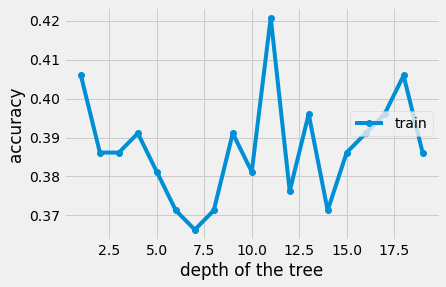

In [455]:
score = [0]
for i in range(1,20):
    estimators1 = [('tree', PCA()), ('clf', DecisionTreeClassifier(max_depth =i,random_state = 4) )]
    pipe1 = Pipeline(estimators1)
    pipe1.fit(X_train,Y_train)
    Y_pred = pipe1.predict(X_dev)
    score.append(np.mean(Y_pred == Y_dev))
np.sort(score)[::-1][0] 

0.4207920792079208

In [844]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
def feature_engineering(X_train,Y_train,X_dev,Y_dev,i):
    KBest = SelectKBest(chi2,k=i)
    KBest.fit(X_train,Y_train)
    X_train = KBest.transform(X_train)
    X_dev = KBest.transform(X_dev)

# score = decision_tree(X_train,Y_train)

In [636]:
#Feature selection
X_train,Y_train, X_test, Y_test, X_dev, Y_dev = feature_selection(X_train,Y_train, X_test, Y_test, X_dev, Y_dev)
#Checking for the baseline models
score = baseline_models(X_train,Y_train,X_dev,Y_dev)

C:\Users\akshay\Documents\GitHub\machine-learning-project\util.py:69: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  baseline_models(X_new,Y_train,X_dev_new,Y_dev)


ValueError: X has a different shape than during fitting.

In [216]:
from xgboost import XGBClassifier
import xgboost as xgb

xgbc = XGBClassifier()
xgbc.fit(X_train, Y_train)
xgbc_pred = xgbc.predict(X_dev)
accuracy_score(Y_dev,xgbc_pred)


ModuleNotFoundError: No module named 'xgboost'

Data visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
 

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = X_train
y = Y_train

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = X_train
y = Y_train

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)